In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ftse = pd.read_csv('https://raw.githubusercontent.com/HKBU-DavidLo/stock_analysis/master/data/ftse.csv', index_col=0, parse_dates=True, dayfirst=True)
ftse.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,7687.799805,7691.299805,7624.100098,7648.100098,7648.100098,576251800
2018-01-03,7648.100098,7689.899902,7640.500000,7671.100098,7671.100098,571662800
2018-01-04,7671.100098,7702.500000,7671.100098,7695.899902,7695.899902,705864000
2018-01-05,7695.899902,7727.700195,7689.799805,7724.200195,7724.200195,636035700
2018-01-08,7724.200195,7733.399902,7691.799805,7696.500000,7696.500000,635135400


In [ ]:
ftse['FTSE'] = ftse['Close'].pct_change(1)

In [ ]:
index = pd.read_csv('https://raw.githubusercontent.com/HKBU-DavidLo/stock_analysis/master/data/4stocks.csv', index_col=0, parse_dates=True, dayfirst=True)

In [ ]:
psn = index[index['Name'] == 'PSN.L'].copy()

In [ ]:
psn.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2018-01-02,2756.0,2756.0,2706.0,2751.0,1651.003906,776632,PSN.L
2018-01-03,2760.0,2774.0,2749.0,2753.0,1652.204346,952701,PSN.L
2018-01-04,2768.0,2789.0,2749.0,2754.0,1652.804199,972580,PSN.L
2018-01-05,2757.0,2787.0,2751.0,2778.0,1667.207764,965181,PSN.L
2018-01-08,2770.0,2770.0,2723.0,2748.0,1649.203491,1196318,PSN.L


In [ ]:
psn['PSN'] = psn['Close'].pct_change(1)

In [ ]:
joined = psn[['PSN']].join(ftse['FTSE'])

In [ ]:
joined.head()

,PSN,FTSE
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.000727,0.003007
2018-01-04,0.000363,0.003233
2018-01-05,0.008715,0.003677
2018-01-08,-0.010799,-0.003586


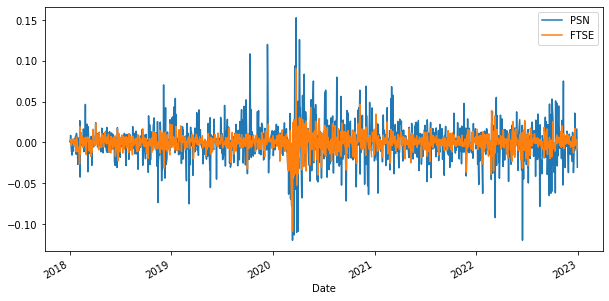

In [ ]:
joined.plot(figsize=(10, 5));

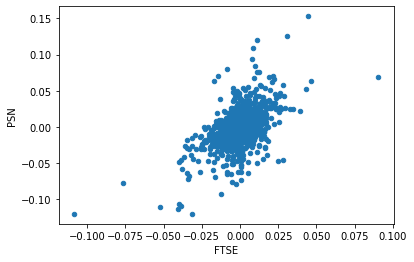

In [ ]:
joined.plot.scatter('FTSE', 'PSN');

# Alpha and Beta

In [ ]:
joined.dropna(inplace=True)
X = joined[['FTSE']].to_numpy()
Y = joined[['PSN']].to_numpy()

In [ ]:
X.shape, Y.shape

((1261, 1), (1261, 1))

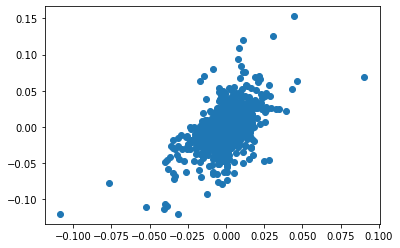

In [ ]:
plt.scatter(X, Y);

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

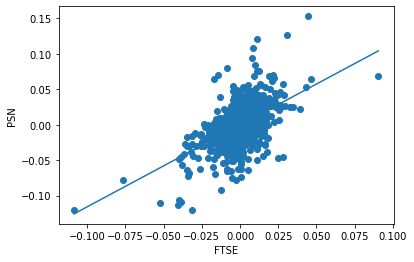

In [ ]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)
plt.scatter(X, Y)
plt.xlabel('FTSE')
plt.ylabel('PSN')
plt.plot(X_predict, Y_predict);

In [ ]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([-0.00042417]), array([[1.15278681]]))

In [ ]:
joined.std()

PSN     0.023770
FTSE    0.011234
dtype: float64

In [ ]:
joined['PSN'].std() / joined['FTSE'].std()

2.115949116409785

# Mixture of Gaussians

In [ ]:
crst = index[index['Name'] == 'CRST.L'].copy()
crst.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2018-01-02,539.5,551.0,529.5,545.5,396.525574,591507,CRST.L
2018-01-03,549.0,551.5,545.5,549.0,399.069702,469233,CRST.L
2018-01-04,547.5,554.0,545.5,547.5,397.979370,452436,CRST.L
2018-01-05,549.5,563.5,548.0,563.5,409.609833,742537,CRST.L
2018-01-08,565.0,565.0,550.5,552.0,401.250427,841458,CRST.L


In [ ]:
crst['prev_close'] = crst['Close'].shift(1)
crst['return'] = crst['Close'] / crst['prev_close'] - 1
crst['log_return'] = np.log(crst['return'] + 1)

In [ ]:
from sklearn.mixture import GaussianMixture
data = crst['log_return'].dropna().to_numpy().reshape(-1, 1)
model = GaussianMixture(n_components=2)
model.fit(data)

weights = model.weights_
means = model.means_
cov = model.covariances_
print("weights: ", weights)
print("means: ", means)
print("covariances: ", cov)

weights:  [0.78416858 0.21583142]
means:  [[-0.00046168]
 [-0.00139182]]
covariances:  [[[0.000279  ]]

 [[0.00299885]]]


In [ ]:
from scipy.stats import norm

In [ ]:
means = means.flatten()
var = cov.flatten()

In [ ]:
x_list = np.linspace(data.min(), data.max(), 100)
fx0 = norm.pdf(x_list ,means[0], np.sqrt(var[0]))
fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

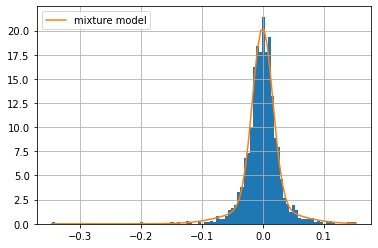

In [ ]:
crst['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.legend();

# Volatility Clustering

In [ ]:
close = pd.read_csv('https://raw.githubusercontent.com/HKBU-DavidLo/stock_analysis/master/data/close_prices.csv', parse_dates=True, dayfirst=True, index_col=0)

In [ ]:
symbols = ['BDEV.L', 'CRST.L', 'PSN.L', 'TW.L']

In [ ]:
sub = close[symbols].copy()
sub.dropna(axis=0, how='all', inplace=True)

In [ ]:
for symbol in symbols:
  sub[symbol + '_prev'] = sub[symbol].shift(1)
  sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1

In [ ]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

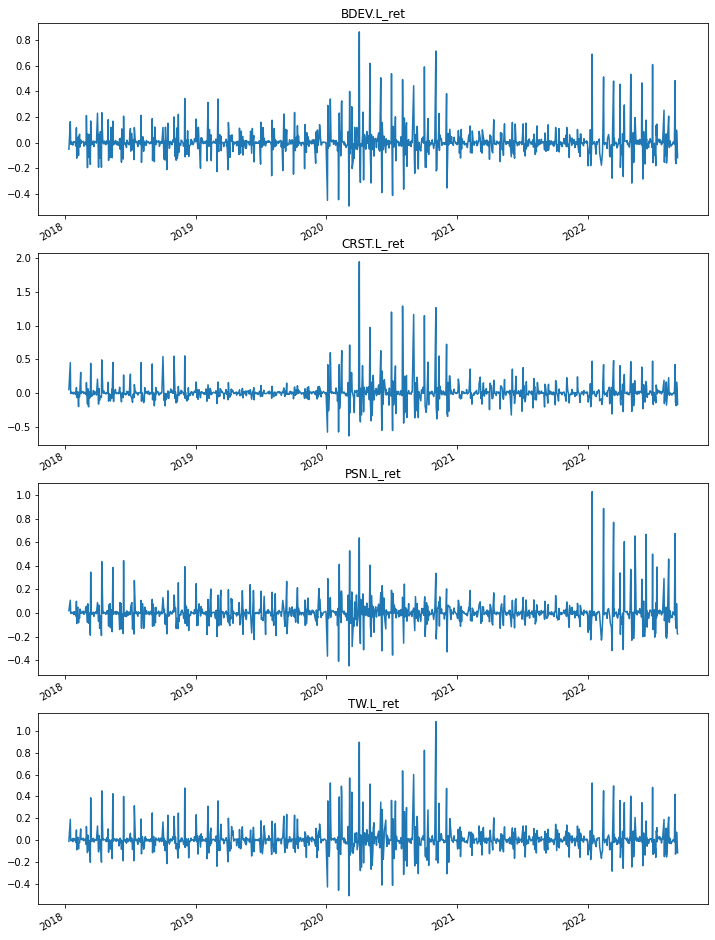

In [ ]:
for i, symbol in enumerate(rets.columns):
  plt.subplot(len(rets.columns), 1, i+1)
  plt.title(symbol)
  rets[symbol].plot(figsize=(12, 18));